In [1]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import japanize_matplotlib

In [2]:
import os

if os.path.exists("../../stylesheet/k_dm.mplstyle"):
    plt.style.use("../../stylesheet/k_dm.mplstyle")

## サンプルデータ
上昇トレンドの中で、細かい波があるデータを作成します。

In [3]:
def create_ARdata(phis=[0.1], N=500, init=1, c=1, sigma=0.3):
    """AR過程のデータを作成する"""
    print(f"==AR({len(phis)})過程の長さ{N}のデータを作成==")
    data = np.zeros(N)
    data[0] = init + np.random.normal(0, sigma)

    for t in range(2, N):
        res = c + np.random.normal(0, sigma)
        for j, phi_j in enumerate(phis):
            res += phi_j * data[t - j - 1]
        data[t] = res
    return data

==AR(2)過程の長さ1000のデータを作成==


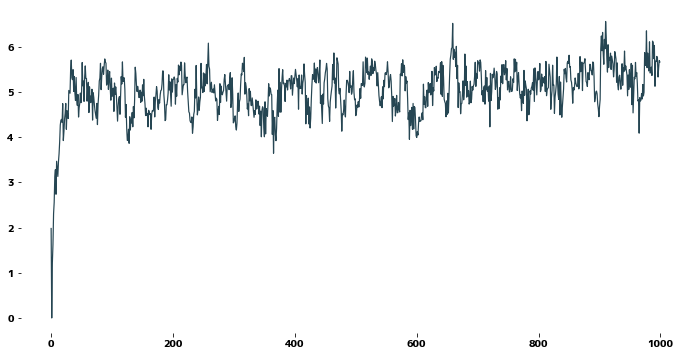

In [4]:
data_ar = create_ARdata(phis=[0.5, 0.3], init=2, N=1000)

plt.figure(figsize=(12, 6))
plt.plot(data_ar)
plt.show()

### 自己相関を確認する

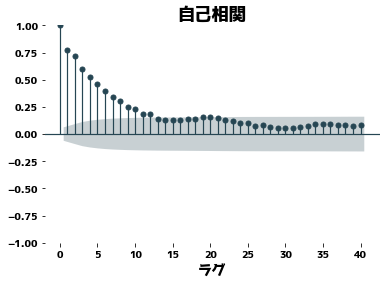

In [5]:
sm.graphics.tsa.plot_acf(data_ar, lags=40)
plt.title("自己相関")
plt.xlabel("ラグ")
plt.show()

### 偏自己相関係数を確認する

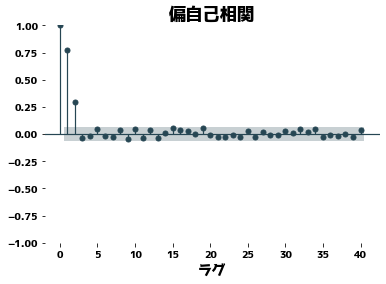

In [6]:
sm.graphics.tsa.plot_pacf(data_ar, lags=40, method="ywm")
plt.title("偏自己相関")
plt.xlabel("ラグ")
plt.show()